# Assignment 1: KNN Classification on the Wine Quality Dataset
    You are tasked with building a KNN classifier to predict the quality of wine based on various chemical properties in the Wine Quality dataset. Follow these steps to complete the assignment:
        1. Download the Wine Quality dataset from the link provided below.
        2. Preprocess the dataset:
            a. Handle any missing values if present.
            b. Standardize the features using StandardScaler.
        3. Split the data into training and testing sets (80% training, 20% testing).
        4. Build a KNN classifier with k=5 and train it on the training data.
        5. Evaluate the model's performance on the test data using accuracy, confusion matrix, and classification report.
        6. Visualize the confusion matrix as a heatmap.
        7. Experiment with different values of k (from 1 to 10) and plot the test accuracy for each value.
    Expected Output:
        * Classification accuracy and confusion matrix.
        * A plot showing how test accuracy changes as k increases.
        * Classification report including precision, recall, and F1-score.

In [6]:
import pandas as pd

In [20]:
df_wine_qt = pd.read_csv('./../datafiles/WineQT.csv')

df_wine_qt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [41]:
df_wine_qt['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
df_wine_qt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
df_wine_qt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [23]:
X = df_wine_qt.drop(columns=['Id', 'quality'])
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
y = df_wine_qt['quality']

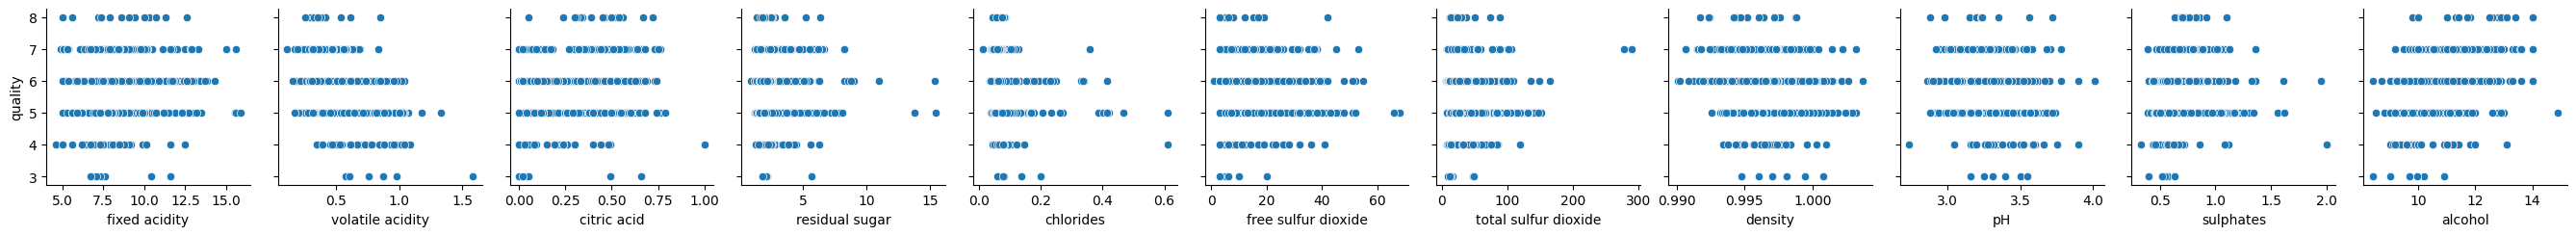

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.PairGrid(df_wine_qt, x_vars=X.columns, y_vars=['quality'])
g.map(sns.scatterplot)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=20)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.5807860262008734

In [61]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  1,  1,  0,  0],
       [ 0,  0, 66, 31,  3,  0],
       [ 0,  0, 27, 55, 13,  0],
       [ 0,  0,  4, 12, 11,  0],
       [ 0,  0,  0,  2,  1,  0]])

In [59]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

print(report_df)

              precision    recall  f1-score     support
3              0.000000  0.000000  0.000000    1.000000
4              1.000000  0.333333  0.500000    3.000000
5              0.666667  0.660000  0.663317  100.000000
6              0.544554  0.578947  0.561224   95.000000
7              0.392857  0.407407  0.400000   27.000000
8              0.000000  0.000000  0.000000    3.000000
accuracy       0.580786  0.580786  0.580786    0.580786
macro avg      0.434013  0.329948  0.354090  229.000000
weighted avg   0.576448  0.580786  0.576192  229.000000


/home/darshan/dev/DR/training/AI_ML/ai_ml_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/darshan/dev/DR/training/AI_ML/ai_ml_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/darshan/dev/DR/training/AI_ML/ai_ml_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

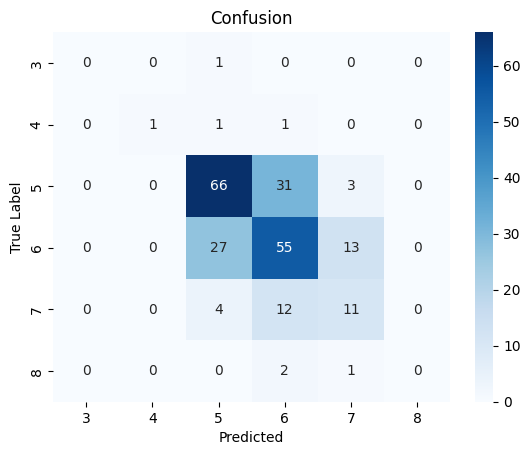

In [74]:
headers = report_df.index[:6]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=headers, yticklabels=headers)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion')
plt.show()

# Assignment 2: KNN Classification on the Titanic Dataset
    Question:
        • In this assignment, you will use the Titanic dataset to predict whether a passenger survived the sinking of the Titanic based on various features. Complete the following tasks:
        • Download the Titanic dataset from the link provided below.
        • Preprocess the data:
            o Handle any missing values, especially in the Age and Embarked columns.
            o Convert categorical variables (e.g., Sex, Embarked) into numerical values using one-hot encoding.
            o Standardize the features using StandardScaler.
        • Split the data into training and testing sets (70% training, 30% testing).
        • Build a KNN classifier with k=5 and train it on the training data.
        • Evaluate the model's performance on the test data using accuracy, confusion matrix, and classification report.
        • Test the model by predicting the survival outcome for a new passenger with the following features:
            o Pclass = 1 (First class)
            o Sex = 'female'
            o Age = 29
            o SibSp = 0 (No siblings/spouses aboard)
            o Parch = 0 (No parents/children aboard)
            o Fare = 50
            o Embarked = 'C' (Cherbourg)
        • Experiment with different values of k (from 1 to 15) and plot the test accuracy for each value.
    Expected Output:
        • Accuracy, confusion matrix, and classification report for the model.
        • Predicted survival outcome for the new passenger.
        • A plot showing the accuracy vs. different values of k

In [285]:
df_titanic = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Titanic.csv')
x_col = ['sex', 'age', 'embarked', 'boat', 'body', 'pclass', 'fare']
y_col = 'survived'

df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [286]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [287]:
df_titanic['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [288]:
clean_df_titanic = df_titanic[~df_titanic['embarked'].isna()]
clean_df_titanic = clean_df_titanic[~df_titanic['fare'].isna()]
clean_df_titanic['age'] = clean_df_titanic['age'].fillna(0)

clean_df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1306 non-null   int64  
 1   survived   1306 non-null   int64  
 2   name       1306 non-null   object 
 3   sex        1306 non-null   object 
 4   age        1306 non-null   float64
 5   sibsp      1306 non-null   int64  
 6   parch      1306 non-null   int64  
 7   ticket     1306 non-null   object 
 8   fare       1306 non-null   float64
 9   cabin      293 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       484 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  744 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 153.0+ KB


/tmp/ipykernel_41105/1572493514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df_titanic = clean_df_titanic[~df_titanic['fare'].isna()]


In [289]:
clean_df_titanic['body'] = clean_df_titanic['body'].apply(lambda x: 1 if pd.notna(x) else 0)
clean_df_titanic['boat'] = clean_df_titanic['boat'].apply(lambda x: 1 if pd.notna(x) else 0)

clean_df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,1,0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1,0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0,0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,0,1,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,0,0,"Montreal, PQ / Chesterville, ON"


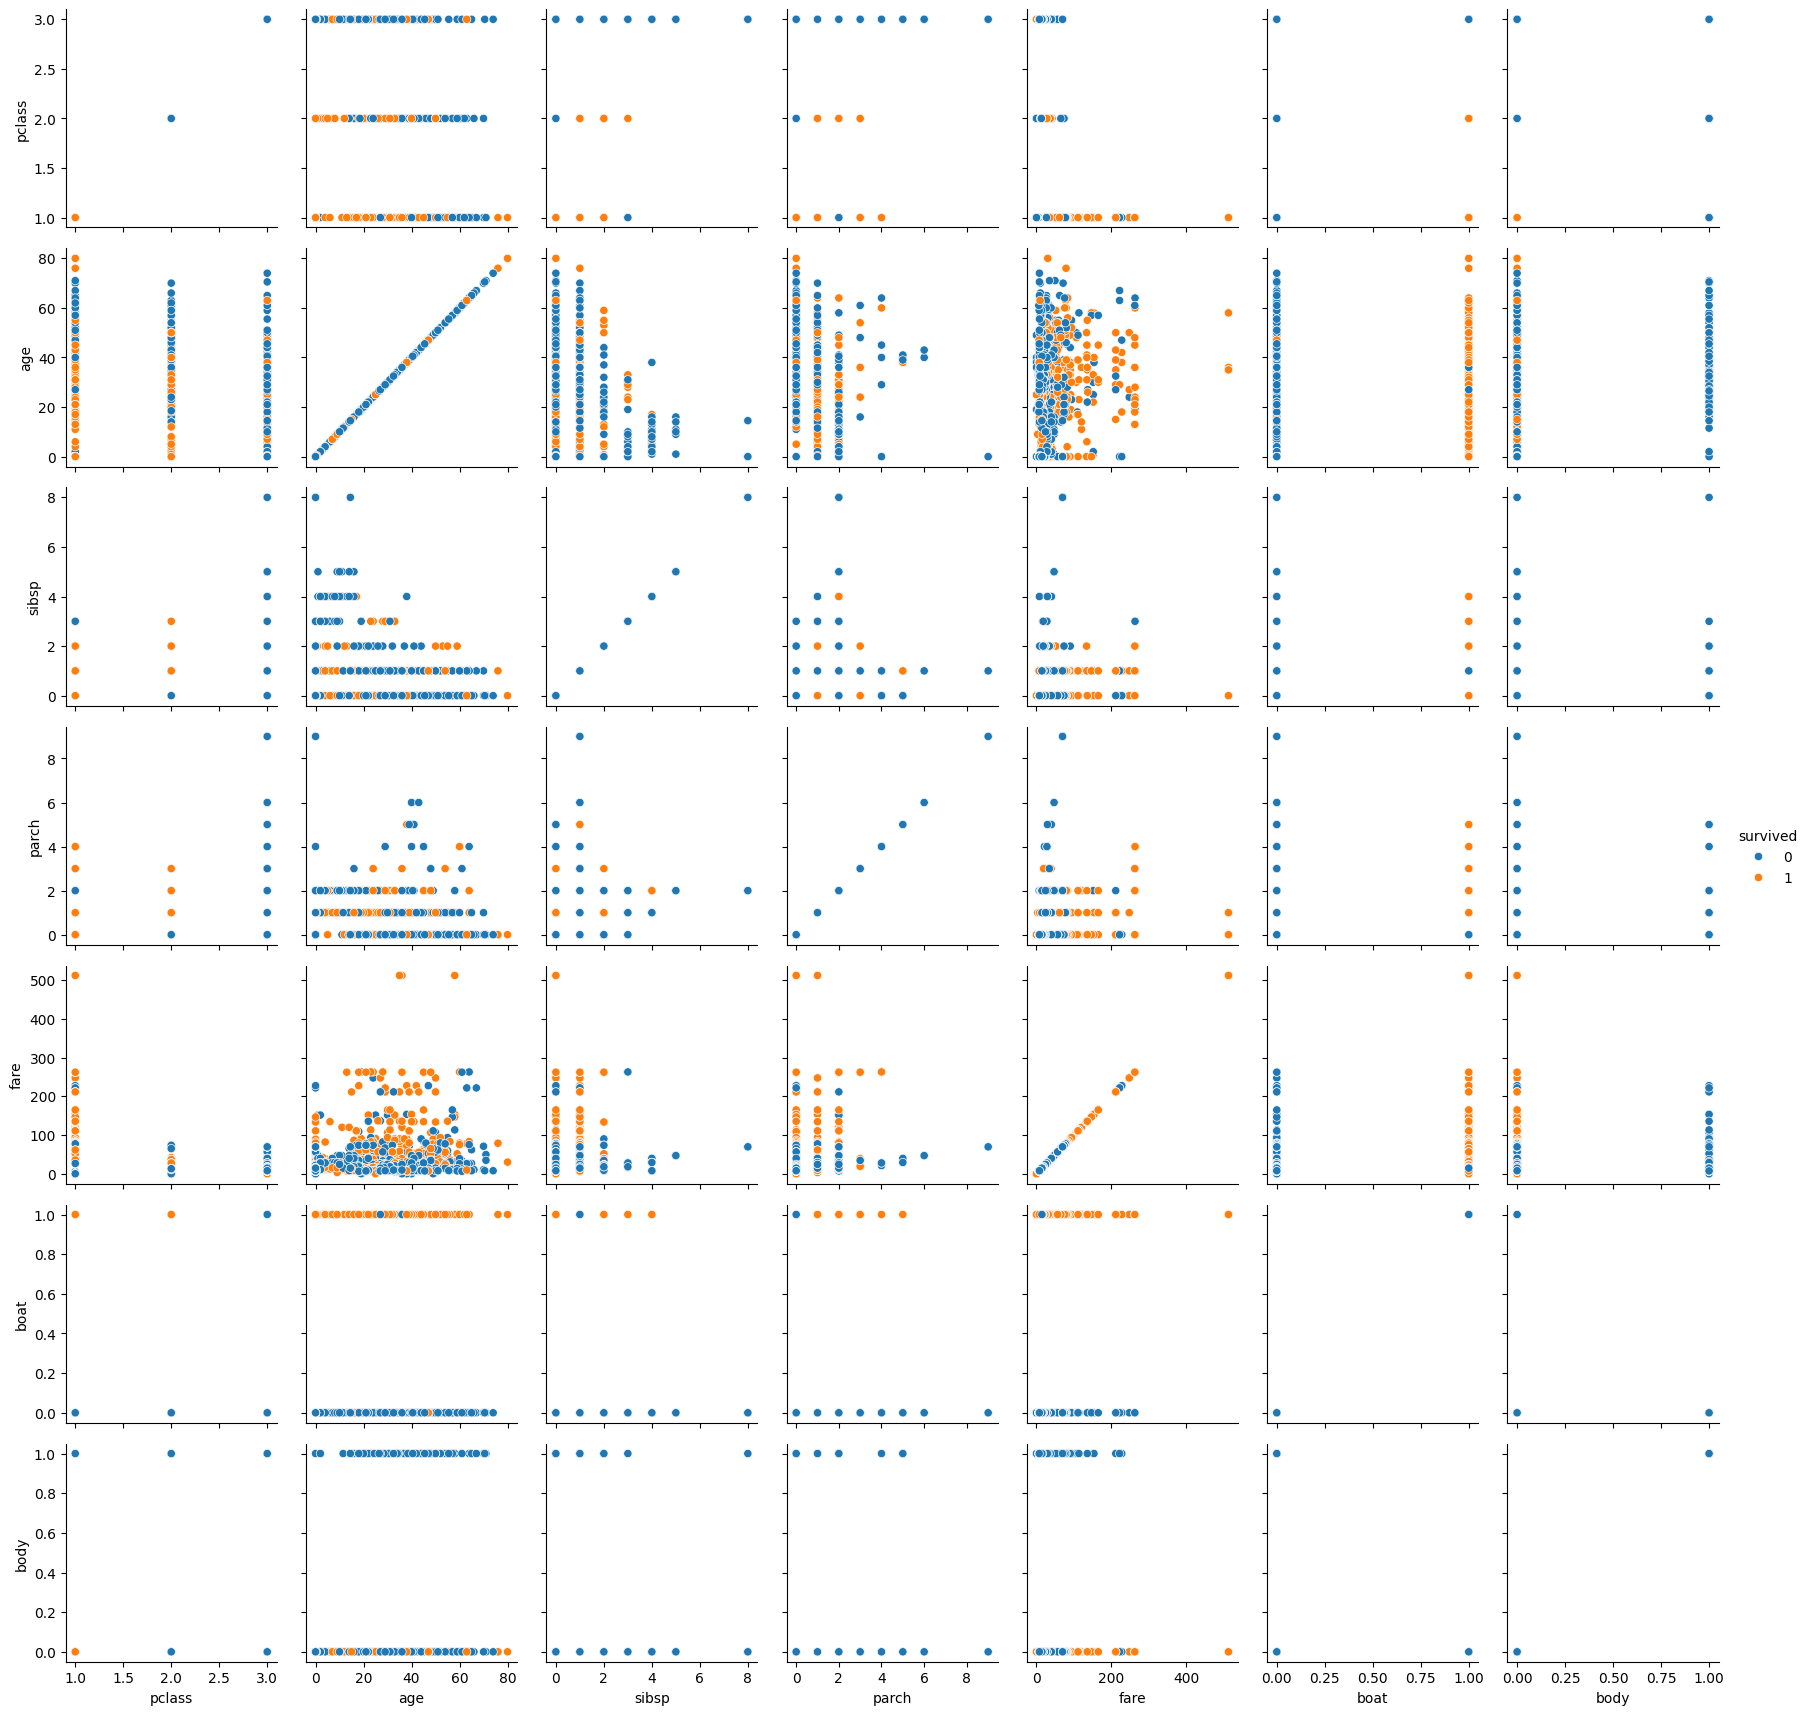

In [290]:
g = sns.PairGrid(clean_df_titanic, hue='survived')
g.map(sns.scatterplot)
g.add_legend()

In [291]:
X = clean_df_titanic[x_col]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1306 non-null   object 
 1   age       1306 non-null   float64
 2   embarked  1306 non-null   object 
 3   boat      1306 non-null   int64  
 4   body      1306 non-null   int64  
 5   pclass    1306 non-null   int64  
 6   fare      1306 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 81.6+ KB


In [292]:
X.head()

,sex,age,embarked,boat,body,pclass,fare
0,female,29.00,S,1,0,1,211.3375
1,male,0.92,S,1,0,1,151.5500
2,female,2.00,S,0,0,1,151.5500
3,male,30.00,S,0,1,1,151.5500
4,female,25.00,S,0,0,1,151.5500


In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1306 non-null   object 
 1   age       1306 non-null   float64
 2   embarked  1306 non-null   object 
 3   boat      1306 non-null   int64  
 4   body      1306 non-null   int64  
 5   pclass    1306 non-null   int64  
 6   fare      1306 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 81.6+ KB


In [294]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['sex', 'embarked'])], remainder='passthrough')
X_clean = np.array(ct.fit_transform(X))
print(X_clean)
print(X_clean.shape)

[[  1.       0.       0.     ...   0.       1.     211.3375]
 [  0.       1.       0.     ...   0.       1.     151.55  ]
 [  1.       0.       0.     ...   0.       1.     151.55  ]
 ...
 [  0.       1.       1.     ...   1.       3.       7.225 ]
 [  0.       1.       1.     ...   0.       3.       7.225 ]
 [  0.       1.       0.     ...   0.       3.       7.875 ]]
(1306, 10)


In [295]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled

array([[ 1.34709137, -1.34709137, -0.51050736, ..., -0.31808873,
        -1.54930064,  3.44206278],
       [-0.74234014,  0.74234014, -0.51050736, ..., -0.31808873,
        -1.54930064,  2.28666312],
       [ 1.34709137, -1.34709137, -0.51050736, ..., -0.31808873,
        -1.54930064,  2.28666312],
       ...,
       [-0.74234014,  0.74234014,  1.95883563, ...,  3.14377692,
         0.84099663, -0.50243254],
       [-0.74234014,  0.74234014,  1.95883563, ..., -0.31808873,
         0.84099663, -0.50243254],
       [-0.74234014,  0.74234014, -0.51050736, ..., -0.31808873,
         0.84099663, -0.48987122]])

In [296]:
y_clean = clean_df_titanic[y_col]
y_clean.info()

<class 'pandas.core.series.Series'>
Index: 1306 entries, 0 to 1308
Series name: survived
Non-Null Count  Dtype
--------------  -----
1306 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [297]:
x_train, x_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=10)

In [313]:
def train_knn_model(x_train, y_train, n_neighbors = 5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

    return knn

knn = train_knn_model(x_train, y_train)
knn

KNeighborsClassifier()

In [314]:
def predict_data(data):
    return knn.predict(data)
    
y_pred = predict_data(x_test)

In [315]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[201,  35],
       [ 67,  89]])

In [301]:
# Classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary into a pandas DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame in a more organized format
print("Classification Report:\n")
print(report_df)

Classification Report:

              precision    recall  f1-score     support
0              0.750000  0.851695  0.797619  236.000000
1              0.717742  0.570513  0.635714  156.000000
accuracy       0.739796  0.739796  0.739796    0.739796
macro avg      0.733871  0.711104  0.716667  392.000000
weighted avg   0.737163  0.739796  0.733188  392.000000


    • Test the model by predicting the survival outcome for a new passenger with the following features:
        o Pclass = 1 (First class)
        o Sex = 'female'
        o Age = 29
        o SibSp = 0 (No siblings/spouses aboard)
        o Parch = 0 (No parents/children aboard)
        o Fare = 50
        o Embarked = 'C' (Cherbourg)

In [302]:
df_input = pd.DataFrame(columns=x_col)
df_input

,sex,age,embarked,boat,body,pclass,fare


In [303]:
# Define a single row of data
row_data = {
    'sex': 'female',
    'age': 29,
    'embarked': 'C',
    'boat': 0,  # Assuming no boat data is provided
    'body': 0,  # Assuming no body data is provided
    'pclass': 1,
    'fare': 50
}

# Add the row data to the DataFrame using loc
df_input.loc[0] = row_data  # Use index 0 for the first row

# Display the DataFrame
print(df_input)

      sex  age embarked  boat  body  pclass  fare
0  female   29        C     0     0       1    50


In [304]:
input_clean = np.array(ct.transform(df_input))
input_scaled = scaler.transform(input_clean)
input_scaled
# input_clean

array([[ 1.34709137, -1.34709137,  1.95883563, -0.32244837, -1.52419002,
         0.29594302, -0.76733812, -0.31808873, -1.54930064,  0.32419879]])

In [306]:
# Predict the class of the new input
prediction = knn.predict(input_scaled)
print(f"Predicted class for new input: {prediction}")

Predicted class for new input: [0]


        • Experiment with different values of k (from 1 to 15) and plot the test accuracy for each value.
        • A plot showing the accuracy vs. different values of k

In [323]:
df_accurance_report = pd.DataFrame(columns=['n_neighbors', 'accuracy'])

for k in range(1, 16):
    knn = train_knn_model(x_train, y_train, k)
    y_pred = predict_data(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    row_data = {
        'n_neighbors': k,
        'accuracy': accuracy
    }
    df_accurance_report.loc[len(df_accurance_report)] = row_data 

df_accurance_report.head()

,n_neighbors,accuracy
0,1,0.788265
1,2,0.721939
2,3,0.750000
3,4,0.724490
4,5,0.739796


<Axes: xlabel='n_neighbors', ylabel='accuracy'>

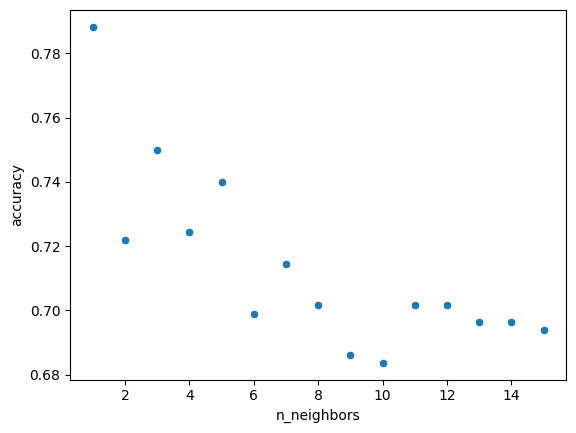

In [325]:
sns.scatterplot(df_accurance_report, x='n_neighbors', y='accuracy')